<a href="https://colab.research.google.com/github/Gatuha/Digital-Wallet-Transactions-Analysis-/blob/main/digital_wallet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
digital_wallet_df = pd.read_csv('/content/drive/MyDrive/dataset/digital_wallet_transactions.csv')
digital_wallet_df.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [5]:
digital_wallet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

In [6]:
digital_wallet_df.isnull().sum()

,0
idx,0
transaction_id,0
user_id,0
transaction_date,0
product_category,0
product_name,0
merchant_name,0
product_amount,0
transaction_fee,0
cashback,0


In [7]:
digital_wallet_df['product_amount'].describe()

,product_amount
count,5000.000000
mean,4957.502722
std,2885.034160
min,10.090000
25%,2453.977500
50%,4943.685000
75%,7444.815000
max,9996.950000


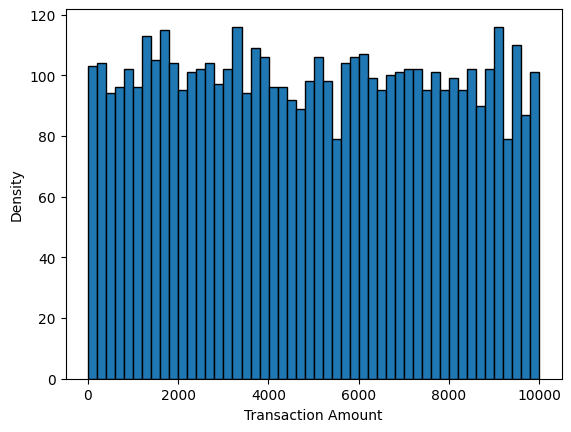

In [8]:
plt.hist(digital_wallet_df['product_amount'], bins = 50, edgecolor = 'black')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

In [9]:
category_summary = digital_wallet_df.groupby('product_category')[['product_amount']].agg(['sum', 'count'])
category_summary = category_summary.sort_values(by=('product_amount', 'sum') , ascending = False)
category_summary

product_amount      
                             sum count
product_category                      
Streaming Service     1462461.66   299
Water Bill            1400668.85   273
Gas Bill              1361519.80   250
Education Fee         1349321.77   286
Movie Ticket          1337399.89   272
Hotel Booking         1319603.90   274
Food Delivery         1317106.21   259
Taxi Fare             1306566.24   256
Rent Payment          1258263.69   251
Internet Bill         1247178.07   233
Electricity Bill      1245972.74   252
Loan Repayment        1210681.76   245
Online Shopping       1207396.13   243
Mobile Recharge       1196334.68   241
Gaming Credits        1136665.44   231
Grocery Shopping      1134972.71   238
Flight Booking        1124283.05   216
Bus Ticket            1115711.58   235
Insurance Premium     1032608.99   225
Gift Card             1022796.45   221

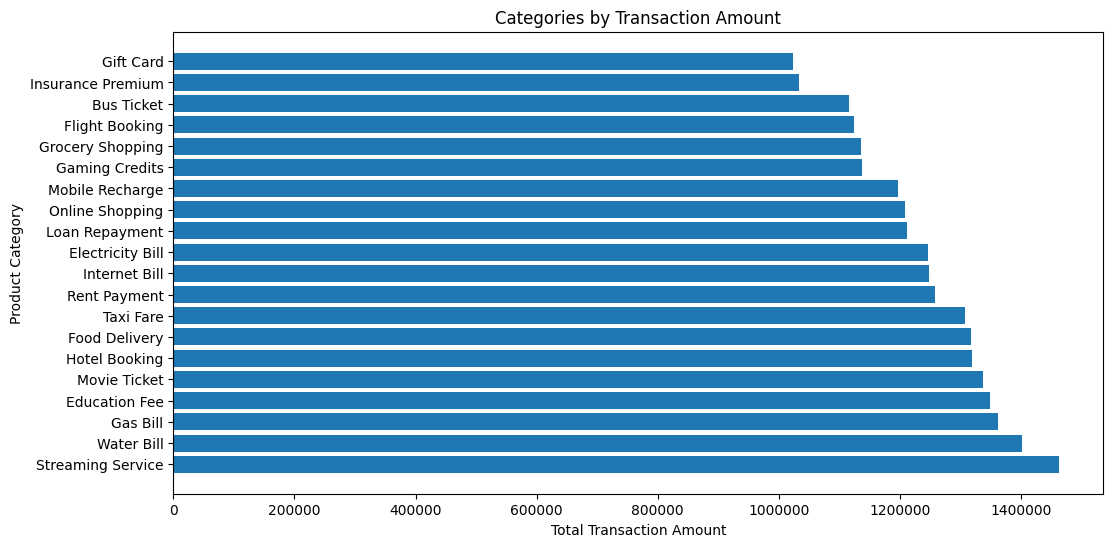

In [10]:
plt.figure(figsize=(12,6))
plt.barh(category_summary.index, category_summary['product_amount']['sum'])
plt.ylabel('Product Category')
plt.xlabel('Total Transaction Amount')
plt.ticklabel_format(axis = 'x' , style = 'plain')
plt.title('Categories by Transaction Amount')
plt.show()

In [11]:
#Let's compare categories by Average Transaction Value (ATV).

atv_df = digital_wallet_df.groupby('product_category')['product_amount'].mean().sort_values(ascending = False).reset_index()
atv_df = atv_df.rename(columns = {'product_amount' : 'average_transaction_value'})
atv_df

,product_category,average_transaction_value
0,Gas Bill,5446.079200
1,Internet Bill,5352.695579
2,Flight Booking,5205.014120
3,Water Bill,5130.655128
4,Taxi Fare,5103.774375
5,Food Delivery,5085.352162
6,Rent Payment,5013.002749
7,Online Shopping,4968.708354
8,Mobile Recharge,4964.044315
9,Electricity Bill,4944.336270


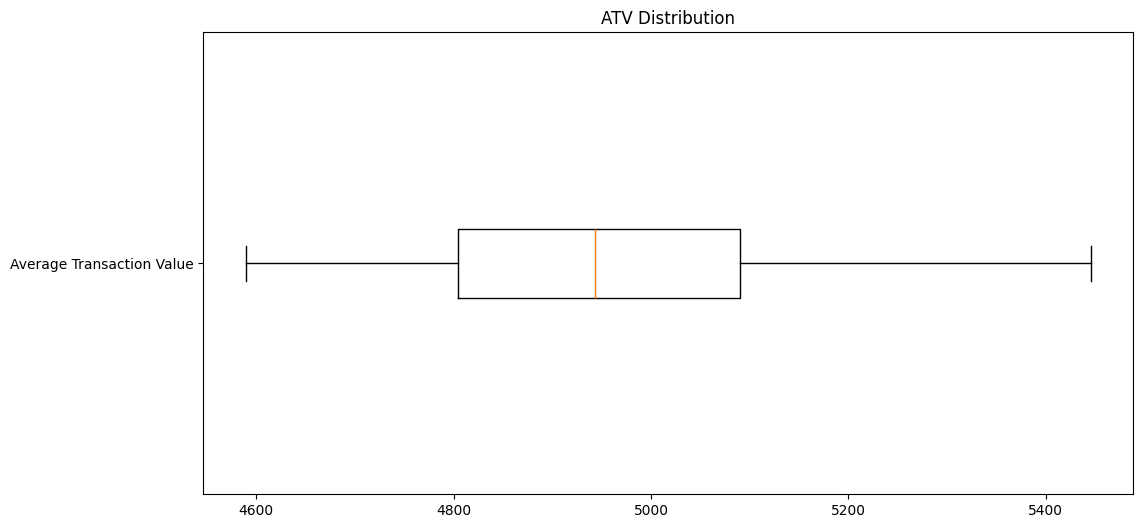

In [12]:
plt.figure(figsize= (12,6))
plt.boxplot([atv_df['average_transaction_value']], labels = ['Average Transaction Value'], vert = False)
plt.title('ATV Distribution')
plt.show()

In [13]:
atv_df.describe()

,average_transaction_value
count,20.000000
mean,4957.591587
std,221.959028
min,4589.373289
25%,4804.252696
50%,4942.947237
75%,5089.957715
max,5446.079200


In [14]:
#calculate the lower and upper bounds for outlier detection

values = atv_df['average_transaction_value']
Q1, Q3 = np.percentile(values, [25, 75])
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'Lower Bound: {lower_bound:.3f}')
print(f'Upper Bound: {upper_bound:.3f}')

Lower Bound: 4375.695
Upper Bound: 5518.515


In [15]:
#identify outliers

outliers = atv_df[(atv_df['average_transaction_value'] < lower_bound) | (atv_df['average_transaction_value'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [product_category, average_transaction_value]
Index: []


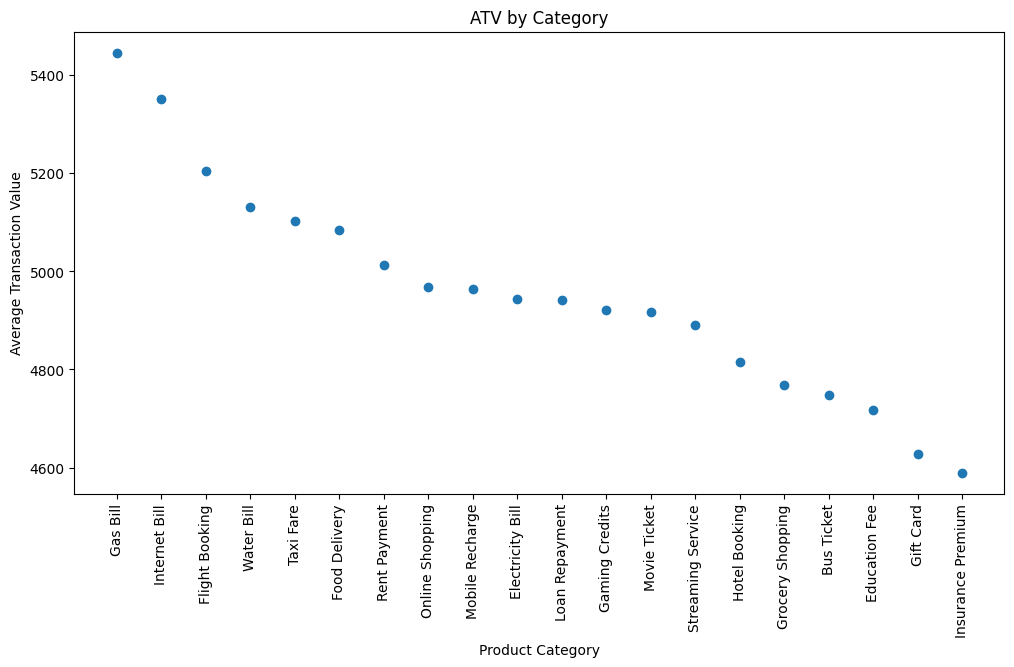

In [16]:
plt.figure(figsize = (12,6))
plt.plot(atv_df['product_category'], atv_df['average_transaction_value'], 'o')
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value')
plt.title('ATV by Category')
plt.xticks(rotation = 90)
plt.show()

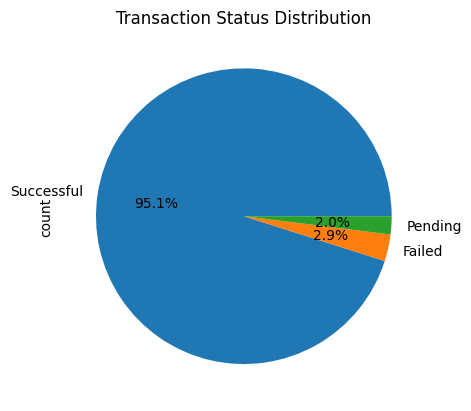

Approximately 95% of transactions are successful, indicating a high rate of transaction completion.


In [17]:
digital_wallet_df['transaction_status'].value_counts().plot(kind='pie' , autopct='%1.1f%%')
plt.title('Transaction Status Distribution')
plt.show()
print("Approximately 95% of transactions are successful, indicating a high rate of transaction completion.")

In [18]:
payment_method_dist = digital_wallet_df.pivot_table(index = 'product_category', columns = 'payment_method' , values = 'product_amount', aggfunc = 'count')
payment_method_dist

payment_method,Bank Transfer,Credit Card,Debit Card,UPI,Wallet Balance
product_category,,,,,
Bus Ticket,66,45,43,42,39
Education Fee,58,47,63,71,47
Electricity Bill,52,51,60,44,45
Flight Booking,41,39,39,51,46
Food Delivery,56,47,56,60,40
Gaming Credits,53,48,40,41,49
Gas Bill,59,42,62,41,46
Gift Card,48,47,46,42,38
Grocery Shopping,50,46,44,48,50


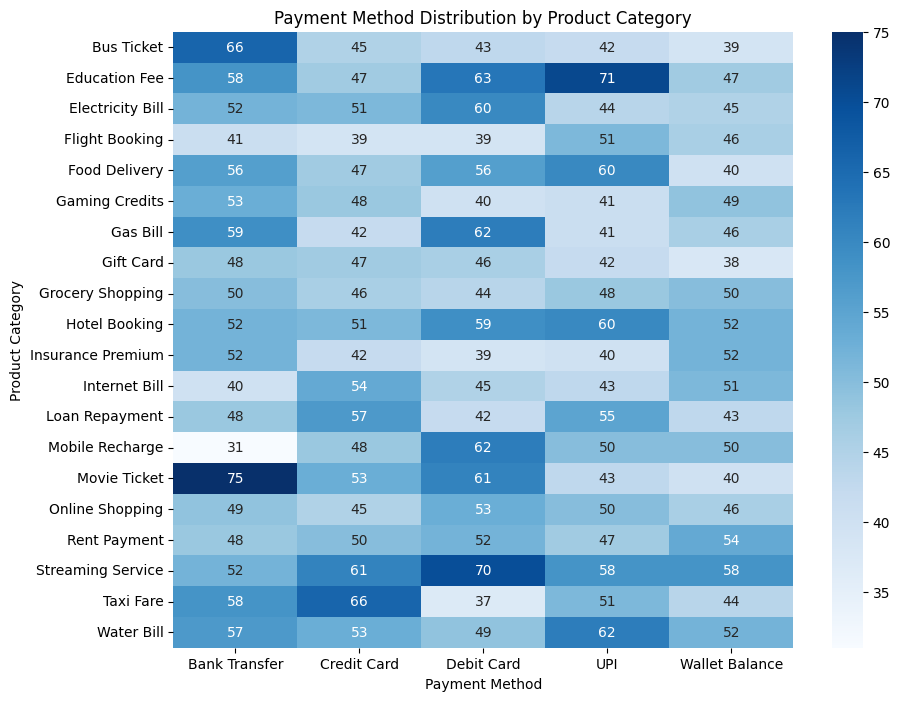

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(payment_method_dist, cmap='Blues', annot=True)
plt.title('Payment Method Distribution by Product Category')
plt.xlabel('Payment Method')
plt.ylabel('Product Category')
plt.show()

In [20]:
print("""Insights:
1. UPI Wallet: Popular for education, streaming, and online services.
2. Credit Card: Preferred for travel, hospitality, and entertainment.
3. Debit Card: Commonly used for daily expenses (groceries, internet).
4. Bank Transfer: Used for utility bills (electricity, gas, water).
5. Balance: Least preferred, possibly due to limited funds or convenience.""")

Insights:
1. UPI Wallet: Popular for education, streaming, and online services.
2. Credit Card: Preferred for travel, hospitality, and entertainment.
3. Debit Card: Commonly used for daily expenses (groceries, internet).
4. Bank Transfer: Used for utility bills (electricity, gas, water).
5. Balance: Least preferred, possibly due to limited funds or convenience.


In [21]:
digital_wallet_df['transaction_date'] = pd.to_datetime(digital_wallet_df['transaction_date'])

In [22]:
digital_wallet_df['month'] = digital_wallet_df['transaction_date'].dt.month
digital_wallet_df.head(2)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,month
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,8
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,8


In [23]:
transaction_by_month = digital_wallet_df.pivot_table(index = 'month', columns = 'product_category', values = 'product_amount', aggfunc = 'mean')
transaction_by_month = transaction_by_month.round(2)
transaction_by_month

product_category,Bus Ticket,Education Fee,Electricity Bill,Flight Booking,Food Delivery,Gaming Credits,Gas Bill,Gift Card,Grocery Shopping,Hotel Booking,Insurance Premium,Internet Bill,Loan Repayment,Mobile Recharge,Movie Ticket,Online Shopping,Rent Payment,Streaming Service,Taxi Fare,Water Bill
month,,,,,,,,,,,,,,,,,,,,
1,4976.60,5472.15,6431.74,4524.12,5868.11,5172.78,4969.59,3924.20,5932.65,3413.88,4086.06,6181.93,4304.54,4628.23,4499.62,4987.86,6358.07,4223.32,5498.77,5121.22
2,3747.18,5910.01,5850.13,5098.53,5684.79,5411.54,5750.58,5079.20,5574.82,5459.47,3943.68,4354.37,5974.95,3907.95,4119.36,4269.50,4561.16,5151.11,5128.03,5429.01
3,5551.33,5396.54,5092.75,4574.32,5298.00,5409.67,4154.22,5558.17,4011.05,4588.00,4851.97,5472.07,4889.14,4799.04,4288.92,5667.22,5452.98,5788.02,5194.97,4700.69
4,4330.23,4817.73,4134.39,4842.60,5451.53,3921.27,6313.98,4783.55,4225.52,4717.29,3076.39,5932.46,5018.65,6173.30,5724.47,4476.27,4440.26,5418.62,6267.81,6194.52
5,4625.41,4192.10,4130.84,5476.70,5039.68,4517.41,4365.21,4193.86,5273.00,4580.13,5838.69,6099.77,4813.06,5511.83,5023.44,3965.80,4639.55,4676.98,5613.05,4207.20
6,3797.57,4314.77,4529.61,5073.04,5446.80,4877.94,6662.60,4029.81,4439.54,5638.48,5270.89,6076.93,4404.45,3647.63,4820.29,5126.96,4283.78,4844.03,5567.90,5215.38
7,5220.92,4436.31,4198.47,6527.45,3473.24,5173.16,6716.20,5158.75,4534.68,5407.00,4735.22,5942.81,4437.77,4957.08,5712.36,5823.75,5791.48,4578.38,5488.20,4734.62
8,4961.72,4566.12,4962.79,5664.61,4237.63,5002.73,5739.63,4739.14,4880.65,5566.20,3886.90,4582.11,5826.60,4409.01,4675.85,6142.51,4844.64,4156.52,5097.59,4970.83
9,4201.05,4723.22,4673.92,4693.83,4216.99,4639.55,4498.42,4728.75,4580.29,3968.40,5318.31,4991.04,5398.36,5065.34,4269.58,4625.55,5018.94,4614.26,4373.33,5161.77


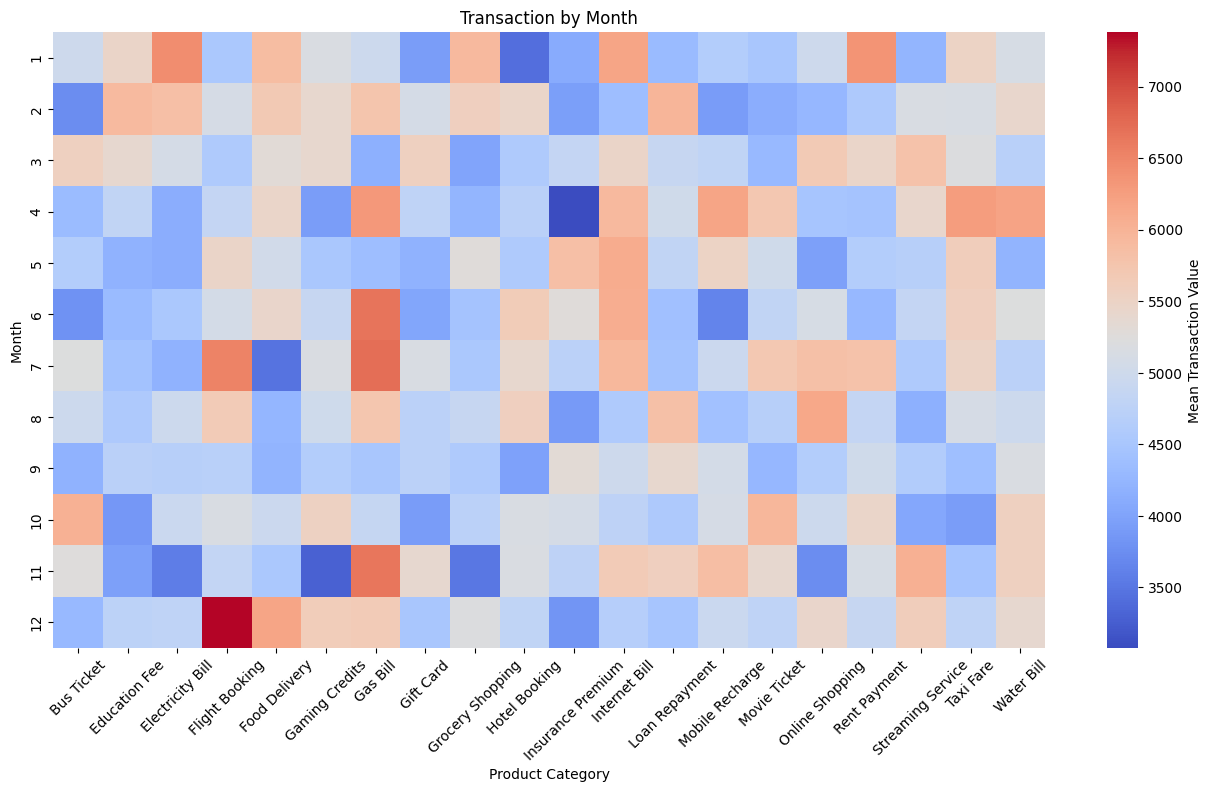

In [24]:
plt.figure(figsize= (16,8))
sns.heatmap(transaction_by_month, cmap = 'coolwarm', annot = False, cbar_kws={'label': 'Mean Transaction Value'})
plt.title('Transaction by Month')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()

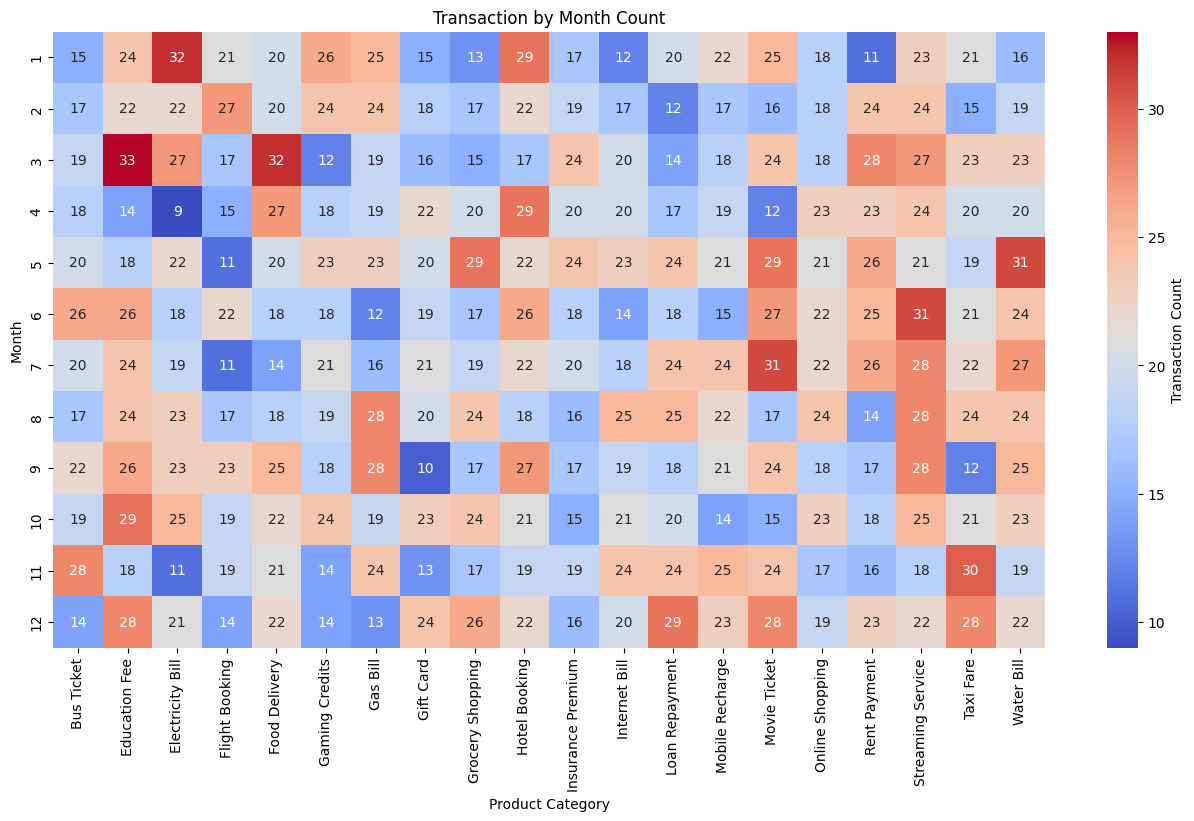

In [25]:
transaction_by_month_count = digital_wallet_df.pivot_table(index = 'month', columns = 'product_category', values = 'product_amount', aggfunc = 'count')
plt.figure(figsize=(16,8))
sns.heatmap(transaction_by_month_count, cmap = 'coolwarm', annot=True, cbar_kws={'label': 'Transaction Count'})
plt.title('Transaction by Month Count')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

In [26]:
print("""Insights:
1. Consistent categories: Bus Ticket, Education Fee, Electricity Bill, and Grocery Shopping show consistent transaction volumes throughout the year.
2. Seasonal fluctuations: Flight Booking, Hotel Booking, and Taxi Fare show increased transactions during months 6-9, indicating summer vacation travel.
3. Peaks and valleys: Transaction volumes peak in months 5-7 and 11-12 for categories like Online Shopping, Gift Card, and Mobile Recharge, potentially
   due to holiday seasons (e.g., Christmas, New Year).
4. Stable growth: Categories like Insurance Premium, Internet Bill, and Loan Repayment show steady growth throughout the year.
5. Variable transactions: Gaming Credits, Movie Ticket, and Streaming Service exhibit irregular transaction patterns.""")

Insights:
1. Consistent categories: Bus Ticket, Education Fee, Electricity Bill, and Grocery Shopping show consistent transaction volumes throughout the year.
2. Seasonal fluctuations: Flight Booking, Hotel Booking, and Taxi Fare show increased transactions during months 6-9, indicating summer vacation travel.
3. Peaks and valleys: Transaction volumes peak in months 5-7 and 11-12 for categories like Online Shopping, Gift Card, and Mobile Recharge, potentially
   due to holiday seasons (e.g., Christmas, New Year).
4. Stable growth: Categories like Insurance Premium, Internet Bill, and Loan Repayment show steady growth throughout the year.
5. Variable transactions: Gaming Credits, Movie Ticket, and Streaming Service exhibit irregular transaction patterns.


In [27]:
digital_wallet_df['day'] = digital_wallet_df['transaction_date'].dt.day_name()
digital_wallet_df.head(2)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,month,day
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,8,Saturday
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,8,Saturday


In [28]:
transaction_by_day = digital_wallet_df.pivot_table (index = 'day', columns = 'product_category', values = 'product_amount', aggfunc = 'mean').loc[['Monday' , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
transaction_by_day = transaction_by_day.round(2)
transaction_by_day

product_category,Bus Ticket,Education Fee,Electricity Bill,Flight Booking,Food Delivery,Gaming Credits,Gas Bill,Gift Card,Grocery Shopping,Hotel Booking,Insurance Premium,Internet Bill,Loan Repayment,Mobile Recharge,Movie Ticket,Online Shopping,Rent Payment,Streaming Service,Taxi Fare,Water Bill
day,,,,,,,,,,,,,,,,,,,,
Monday,4921.27,4351.81,4829.70,5356.06,5472.15,4359.89,5858.21,4703.96,5364.51,4207.77,4374.78,5068.85,5150.72,5513.75,4748.96,4716.47,4931.75,6109.43,4644.66,4951.16
Tuesday,4167.01,4753.26,5742.02,5582.70,5139.01,5136.29,5468.59,5647.14,4714.13,5378.68,5072.51,5370.18,4514.49,4911.70,5443.67,5137.37,4900.58,4465.50,4741.79,4902.45
Wednesday,4163.09,5516.97,4764.93,5140.81,4803.12,5268.24,5680.73,4552.06,3651.42,5078.95,4819.77,5423.70,4621.64,4981.08,5224.21,5548.20,4389.12,4632.72,5065.67,4958.18
Thursday,4440.56,4565.21,4386.72,5661.02,4731.81,4486.06,5135.13,4220.83,5408.91,4219.70,4008.32,5265.29,5358.24,4735.74,4703.19,5204.05,4746.07,4743.49,5619.89,4728.90
Friday,5061.77,4491.00,4569.91,4468.94,5615.08,4740.84,4781.51,4323.23,4918.16,4909.73,5298.18,5596.07,4632.62,4654.63,4923.13,4622.59,5605.63,4787.24,5656.76,6016.43
Saturday,5186.88,4047.52,4953.34,5284.15,5028.85,5018.19,4517.64,4330.21,5065.51,4639.21,5642.17,5199.02,4541.91,5341.45,4920.15,4232.48,4776.99,4468.64,5367.42,5702.53
Sunday,5357.79,4959.06,5102.67,4693.29,4818.23,5295.56,6672.01,4819.33,4128.32,5070.68,3740.11,5444.88,5668.07,4783.43,4620.40,5369.69,5595.26,4927.11,4495.89,4554.61


In [29]:
transaction_by_day_count = digital_wallet_df.pivot_table (index = 'day', columns = 'product_category', values = 'product_amount', aggfunc = 'count').loc[['Monday' , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
transaction_by_day_count

product_category,Bus Ticket,Education Fee,Electricity Bill,Flight Booking,Food Delivery,Gaming Credits,Gas Bill,Gift Card,Grocery Shopping,Hotel Booking,Insurance Premium,Internet Bill,Loan Repayment,Mobile Recharge,Movie Ticket,Online Shopping,Rent Payment,Streaming Service,Taxi Fare,Water Bill
day,,,,,,,,,,,,,,,,,,,,
Monday,30,37,33,33,44,31,40,34,32,32,42,21,38,26,38,34,27,46,32,43
Tuesday,27,34,41,26,34,45,36,27,36,40,28,42,41,35,31,36,39,40,29,30
Wednesday,38,54,45,28,34,35,46,27,33,53,32,31,28,41,38,37,38,39,42,34
Thursday,40,45,34,36,49,32,23,35,42,38,31,33,33,33,35,25,29,35,42,40
Friday,38,33,24,27,34,27,37,37,36,33,26,33,31,38,41,38,40,45,34,33
Saturday,28,40,32,41,34,31,37,29,27,40,23,36,35,33,40,36,38,49,38,53
Sunday,34,43,43,25,30,30,31,32,32,38,43,37,39,35,49,37,40,45,39,40


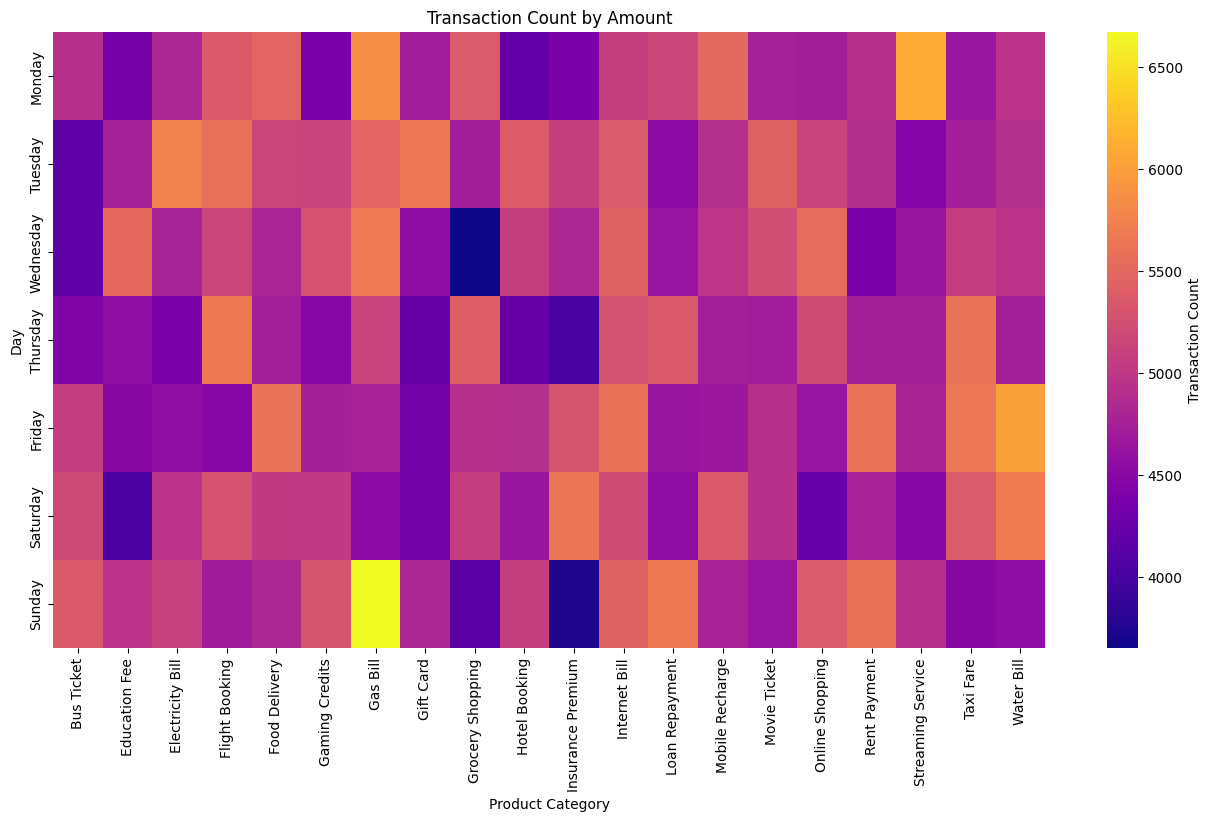

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(transaction_by_day, cmap = 'plasma', annot = False, cbar_kws={'label' : 'Transaction Count'})
plt.title('Transaction Count by Amount')
plt.xlabel('Product Category')
plt.ylabel('Day')
plt.show()

In [31]:
print("""Insights:
1. Peak days: Saturday and Sunday have highest transactions for most categories.
2. Weekday patterns: Monday and Friday show increased transactions, while Tuesday-Thursday have relatively consistent volumes.
3. Category-specific patterns:
    - Bus Ticket: Peak on Sunday.
    - Education Fee: Consistent throughout the week.
    - Flight Booking: Peak on Saturday.
    - Food Delivery: Peak on Friday and Saturday.
    - Gaming Credits: Peak on Sunday.""")

Insights:
1. Peak days: Saturday and Sunday have highest transactions for most categories.
2. Weekday patterns: Monday and Friday show increased transactions, while Tuesday-Thursday have relatively consistent volumes.
3. Category-specific patterns:
    - Bus Ticket: Peak on Sunday.
    - Education Fee: Consistent throughout the week.
    - Flight Booking: Peak on Saturday.
    - Food Delivery: Peak on Friday and Saturday.
    - Gaming Credits: Peak on Sunday.


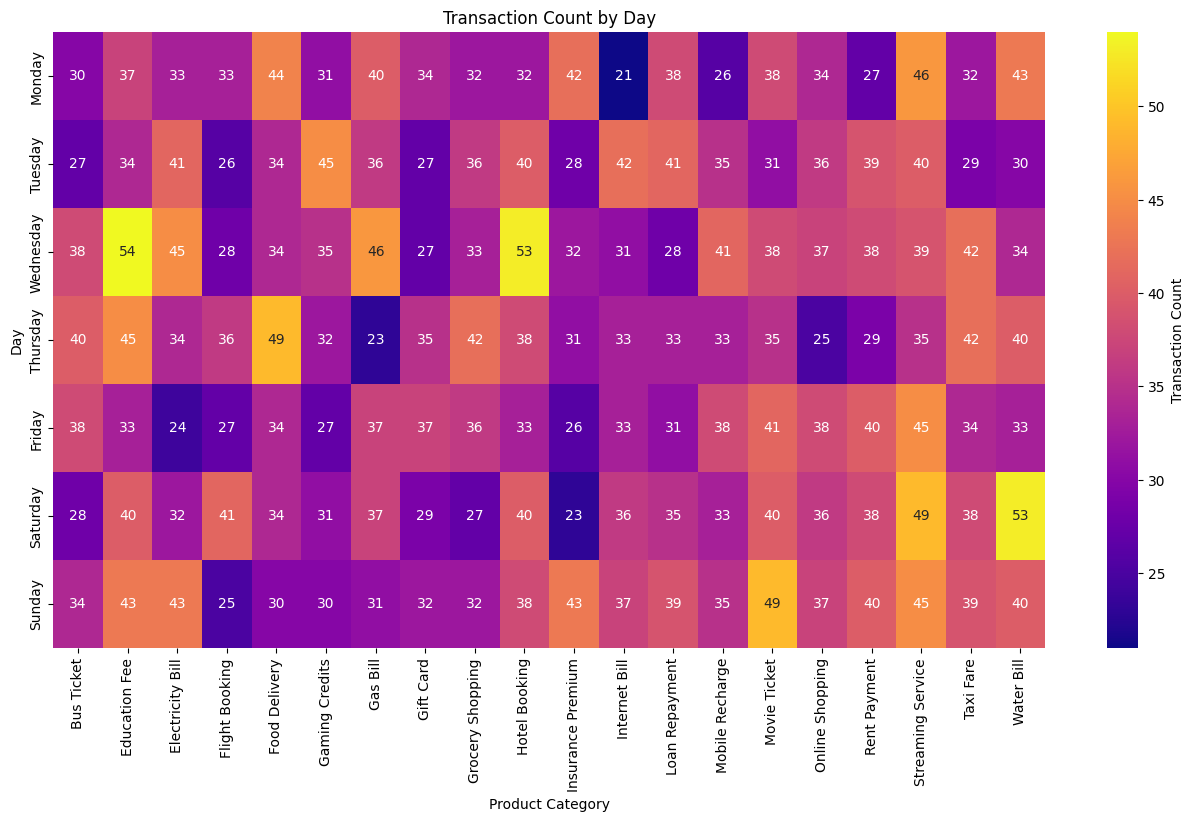

In [32]:
plt.figure(figsize=(16,8))
sns.heatmap(transaction_by_day_count, cmap = 'plasma', annot = True, cbar_kws={'label' : 'Transaction Count'})
plt.title('Transaction Count by Day')
plt.xlabel('Product Category')
plt.ylabel('Day')
plt.show()

In [33]:
print("""1. Busiest days: Sunday (343) and Saturday (339) have highest total transactions.
2. Consistent categories: Education Fee, Grocery Shopping, and Insurance Premium have relatively consistent transactions throughout the week.
3. Peaky categories:
    - Flight Booking: Peaks on Saturday (41).
    - Food Delivery: Peaks on Monday (44) and Thursday (49).
    - Gaming Credits: Peaks on Tuesday (45).
4. Low-transaction days:
    - Tuesday (294) and Wednesday (305) have lowest total transactions.""")

1. Busiest days: Sunday (343) and Saturday (339) have highest total transactions.
2. Consistent categories: Education Fee, Grocery Shopping, and Insurance Premium have relatively consistent transactions throughout the week.
3. Peaky categories:
    - Flight Booking: Peaks on Saturday (41).
    - Food Delivery: Peaks on Monday (44) and Thursday (49).
    - Gaming Credits: Peaks on Tuesday (45).
4. Low-transaction days:
    - Tuesday (294) and Wednesday (305) have lowest total transactions.


In [34]:
online_shopping = digital_wallet_df[digital_wallet_df['product_category'] == 'Online Shopping']
online_shopping.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,month,day
10,11,b7d8c70d-b6c8-433b-9f80-f9f5ce2d4fc4,USER_00434,2023-08-19 10:15:00,Online Shopping,Fitness Tracker,Flipkart,3186.45,36.06,16.12,812,UPI,Successful,MERCH_0371,iOS,Suburban,8,Saturday
12,13,67709f94-e412-46f9-9358-c1203a7f4ade,USER_01944,2023-08-19 12:17:00,Online Shopping,Laptop Backpack,Myntra,9421.81,13.69,66.79,522,UPI,Successful,MERCH_0130,Android,Suburban,8,Saturday
25,26,1dab5c5f-d3fb-43de-a225-29c113d42a49,USER_09865,2023-08-20 03:45:00,Online Shopping,Smart LED TV,Flipkart,7076.38,19.16,41.87,202,Wallet Balance,Successful,MERCH_0709,iOS,Urban,8,Sunday
62,63,c6dbd684-88f7-4ecc-bd22-c674dbfb13d9,USER_03732,2023-08-22 13:11:00,Online Shopping,Smart LED TV,Myntra,3771.14,39.58,91.57,547,UPI,Successful,MERCH_0480,Android,Urban,8,Tuesday
73,74,666d31da-1bce-435c-b3e9-ac338a4bbe63,USER_06348,2023-08-23 03:27:00,Online Shopping,Fitness Tracker,Nykaa,8391.75,31.98,99.29,514,Bank Transfer,Successful,MERCH_0211,Android,Urban,8,Wednesday


In [35]:
online_shopping.groupby('merchant_name')['product_amount'].count().reset_index()

,merchant_name,product_amount
0,Amazon,45
1,Flipkart,57
2,Myntra,47
3,Nykaa,43
4,Snapdeal,51


In [45]:
online_shopping.groupby(['payment_method', 'merchant_name'])['product_amount'].count().reset_index()

,payment_method,merchant_name,product_amount
0,Bank Transfer,Amazon,12
1,Bank Transfer,Flipkart,13
2,Bank Transfer,Myntra,9
3,Bank Transfer,Nykaa,7
4,Bank Transfer,Snapdeal,8
5,Credit Card,Amazon,12
6,Credit Card,Flipkart,8
7,Credit Card,Myntra,5
8,Credit Card,Nykaa,8
9,Credit Card,Snapdeal,12


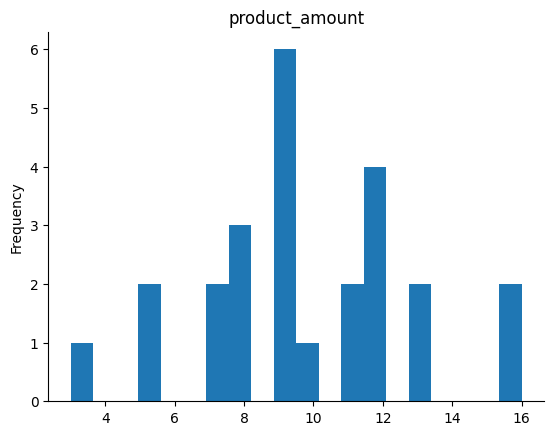

In [44]:
from matplotlib import pyplot as plt
_df_0['product_amount'].plot(kind='hist', bins=20, title='product_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
print("""Insights:
1. Merchants have diverse customer bases with varying payment preferences.
2. No single payment method is favored across all merchants.
3. Customers choose payment methods based on individual preferences.
""")

Insights:
1. Merchants have diverse customer bases with varying payment preferences.
2. No single payment method is favored across all merchants.
3. Customers choose payment methods based on individual preferences.



In [38]:
online_product_sales = online_shopping.pivot_table(index = 'month' , columns = 'product_name', values = 'product_amount', aggfunc = 'mean').round(2)
online_product_sales.head()

product_name,Fitness Tracker,Laptop Backpack,Smart LED TV,Steel Toe Shoes,Wireless Earbuds
month,,,,,
1,6267.19,3259.40,5591.65,4117.13,NaN
2,4504.31,4728.99,4077.95,4559.58,3586.04
3,6117.53,3345.49,1951.27,7885.66,7948.88
4,1300.09,3206.01,6549.70,7116.41,5813.77
5,5956.19,2725.00,4058.20,5323.72,3245.35


In [47]:
# prompt: Using dataframe online_product_sales: LINE

import altair as alt

# Reshape the data for Altair
# Reset the index to make 'month' a regular column
sales_long = online_product_sales.reset_index().melt(id_vars='month', var_name='Product', value_name='Sales')


# Create the line chart
alt.Chart(sales_long).mark_line().encode(
    x='month',
    y='Sales',
    color='Product',
    tooltip=['month', 'Product', 'Sales']
).interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [39]:
print("""Insights:
1. The Fitness Tracker and Wireless Earbuds have relatively consistent sales throughout the year.
2. Laptop sales peak in months 6 and 8.
3. Smart LED TV sales have significant fluctuations, with peaks in months 3, 4, and 12.
4. Backpack sales are lowest in month 4.
5. Steel Toe Shoes sales are relatively stable, with a slight increase in month 12.""")

Insights:
1. The Fitness Tracker and Wireless Earbuds have relatively consistent sales throughout the year.
2. Laptop sales peak in months 6 and 8.
3. Smart LED TV sales have significant fluctuations, with peaks in months 3, 4, and 12.
4. Backpack sales are lowest in month 4.
5. Steel Toe Shoes sales are relatively stable, with a slight increase in month 12.


In [40]:
#analyze which payment method has the highest transaction fee, cashback, loyalty points
payment_pivot = digital_wallet_df.groupby('payment_method')[['product_amount','transaction_fee', 'cashback', 'loyalty_points']].mean().round(2)
payment_pivot

,product_amount,transaction_fee,cashback,loyalty_points
payment_method,,,,
Bank Transfer,4993.44,24.67,50.13,491.31
Credit Card,4926.38,25.41,49.00,495.30
Debit Card,5049.10,25.14,51.14,518.19
UPI,4903.53,25.83,52.17,485.77
Wallet Balance,4908.27,24.90,50.86,503.54


In [41]:
payment_pivot['Transaction Fee Percentage'] = (payment_pivot['transaction_fee'] / payment_pivot['product_amount']) * 100
payment_pivot['Cashback Percentage'] = (payment_pivot['cashback'] / payment_pivot['product_amount']) * 100
payment_pivot['Loyalty Points Percentage'] = (payment_pivot['loyalty_points'] / payment_pivot['product_amount']) * 100

In [42]:
payment_pivot.head()

,product_amount,transaction_fee,cashback,loyalty_points,Transaction Fee Percentage,Cashback Percentage,Loyalty Points Percentage
payment_method,,,,,,,
Bank Transfer,4993.44,24.67,50.13,491.31,0.494048,1.003917,9.839109
Credit Card,4926.38,25.41,49.00,495.30,0.515795,0.994645,10.054036
Debit Card,5049.10,25.14,51.14,518.19,0.497911,1.012854,10.263017
UPI,4903.53,25.83,52.17,485.77,0.526763,1.063927,9.906537
Wallet Balance,4908.27,24.90,50.86,503.54,0.507307,1.036210,10.259012


In [43]:
print("""Insights:
1. UPI offers the highest cashback percentage (1.06%).
2. Debit Card provides the most loyalty points percentage (10.26%).
3. Bank Transfer has the lowest transaction fee percentage (0.49%).

Recommendations:
1. Cashback: UPI
2. Loyalty Points: Debit Card
3. Transaction Fee: Bank Transfer""")


Insights:
1. UPI offers the highest cashback percentage (1.06%).
2. Debit Card provides the most loyalty points percentage (10.26%).
3. Bank Transfer has the lowest transaction fee percentage (0.49%).

Recommendations:
1. Cashback: UPI
2. Loyalty Points: Debit Card
3. Transaction Fee: Bank Transfer
